# Caso Banco

#### Usted ha comenzado a trabajar para el departamento de marketing de un banco. Su antecesor 
#### dejó avanzado parte de un análisis que había encargado el director de marketing respecto del 
#### rendimiento de una campaña. Para que usted continúe el trabajo se le entrega el notebook que 
#### venía trabajando su antecesor (notebook semana 2 visto en clases) y el siguiente set de datos: 

In [1]:
# Importamos librerias a utilizar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
df_banco = pd.read_csv("https://raw.githubusercontent.com/MFuchs1989/Datasets-and-Miscellaneous/main/datasets/bank-additional-full.csv", sep=";")

encoder_y = LabelBinarizer()
y_encoded = encoder_y.fit_transform(df_banco.y.values.reshape(-1,1))
df_banco["conversion"] = y_encoded

# Primeras 5 filas del dataset
df_banco.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


### utilizando LabelBinarize que posteriormentente usaremos para realizar una transformación Binaria la cual sera almacenada en y_encoded y es agregada como una nueva columna en el DataFram y esta columna tiene por nombre "conversion"

In [2]:
print(f"Dimensiones del dataset: {df_banco.shape} \n")
print(f"Tipos de datos:\n {df_banco.dtypes} \n")
print(f"Cantidad de valores nulos:\n {df_banco.isnull().sum()}")

Dimensiones del dataset: (41188, 22) 

Tipos de datos:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
conversion          int64
dtype: object 

Cantidad de valores nulos:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.pri

# 2. Aplicación del código de su antecesor e interpretación para las siguientes métricas: 

### 2.1 Conversión absoluta y tasa de conversión. 

In [3]:
# Conversión absolutas y tasa de conversión
print("Conversiones Asbsolutas: %i de %i" % (df_banco.conversion.sum(), df_banco.shape[0]))
print("Tasa de Conversión: %0.2f%%" % (df_banco.conversion.sum() / df_banco.shape[0] * 100.0))

Conversiones Asbsolutas: 4640 de 41188
Tasa de Conversión: 11.27%


### 2.2 Tasa de conversión por edad y por grupo etario. 

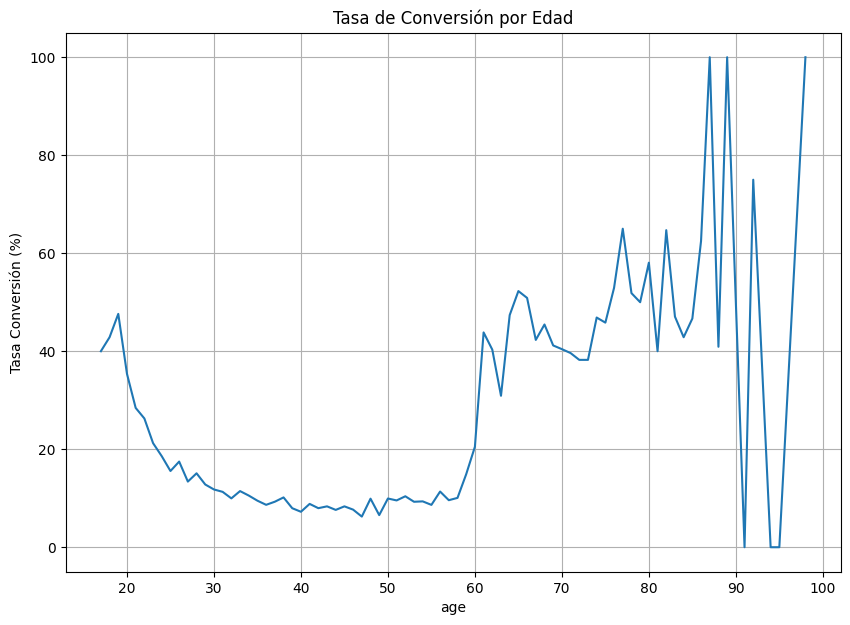

In [4]:
# Calculamos ahora la tasa de conversión por edad
tasa_conversion_edad = df_banco.groupby(by="age")["conversion"].sum() / df_banco.groupby(by="age")["conversion"].count() * 100.0
#graficamos la tasa de conversion por edad
ax = tasa_conversion_edad.plot(
    grid=True,
    figsize=(10, 7),
    title="Tasa de Conversión por Edad")

ax.set_xlabel("age")
ax.set_ylabel("Tasa Conversión (%)")
plt.show()

age_group
70<         47.121535
<20         45.333333
[20, 30]    15.874151
[30, 40]    10.125162
[40, 50]     7.923238
[50, 60]    10.157389
[60, 70]    34.668508
Name: conversion, dtype: float64


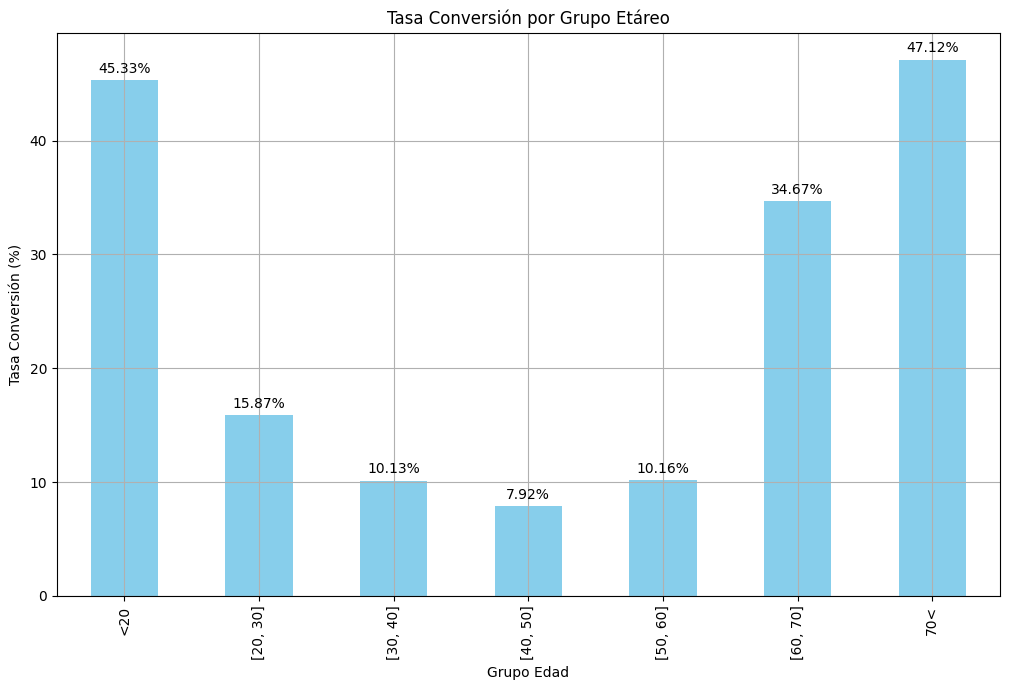

In [5]:
# Calculamos ahora la Tasa de Conversión por Edad y Grupo Etáreo
# La función creada genera una columna con los Grupos Etáreos

def grupo_edad_funcion(df_banco):
    if(df_banco["age"] >= 70):
        return "70<"
    elif(df_banco["age"] < 70) and (df_banco["age"] >= 60):
        return "[60, 70]"
    elif(df_banco["age"] <= 60) and (df_banco["age"] >= 50):
        return "[50, 60]"
    elif(df_banco["age"] <= 50) and (df_banco["age"] >= 40):
        return "[40, 50]"
    elif(df_banco["age"] <= 40) and (df_banco["age"] >= 30):
        return "[30, 40]"
    elif(df_banco["age"] <= 30) and (df_banco["age"] >= 20):
        return "[20, 30]"
    elif(df_banco["age"] < 20):
        return "<20"
df_banco["age_group"] = df_banco.apply(grupo_edad_funcion, axis=1)
tasa_conversion_grupo_edad = df_banco.groupby(by="age_group")["conversion"].sum() / df_banco.groupby(by="age_group")["conversion"].count()*100.0
print(tasa_conversion_grupo_edad)


# Graficamos la Tasa de Conversión de Grupo Etáreo
ax = tasa_conversion_grupo_edad.loc[["<20", "[20, 30]", "[30, 40]", "[40, 50]", "[50, 60]", "[60, 70]", "70<"]].plot(
    kind="bar",
    color="skyblue",
    grid=True,
    figsize=(10, 7),
    title="Tasa Conversión por Grupo Etáreo")

#Extra
# Para añadir lo que seria el porcentaje en las barras para así ser mucho más claro visualmente con los datos
# ax.containers[0] contiene el conjunto de barras que acabamos de dibujar
ax.bar_label(ax.containers[0],   # etiqueta cada rectángulo de esa colección
             fmt="%.2f%%",        # formato con dos decimales y símbolo %
             padding=3)           # sangría en píxeles por encima de la barra

plt.tight_layout()
ax.set_xlabel("Grupo Edad")
ax.set_ylabel("Tasa Conversión (%)")
plt.show()

### 2.3 Tasa de conversión por estado marital. 

          No Convertidos  Conversión
marital                             
divorced            4136         476
married            22396        2532
single              9948        1620
unknown               68          12


array([<Axes: ylabel='No Convertidos'>, <Axes: ylabel='Conversión'>],
      dtype=object)

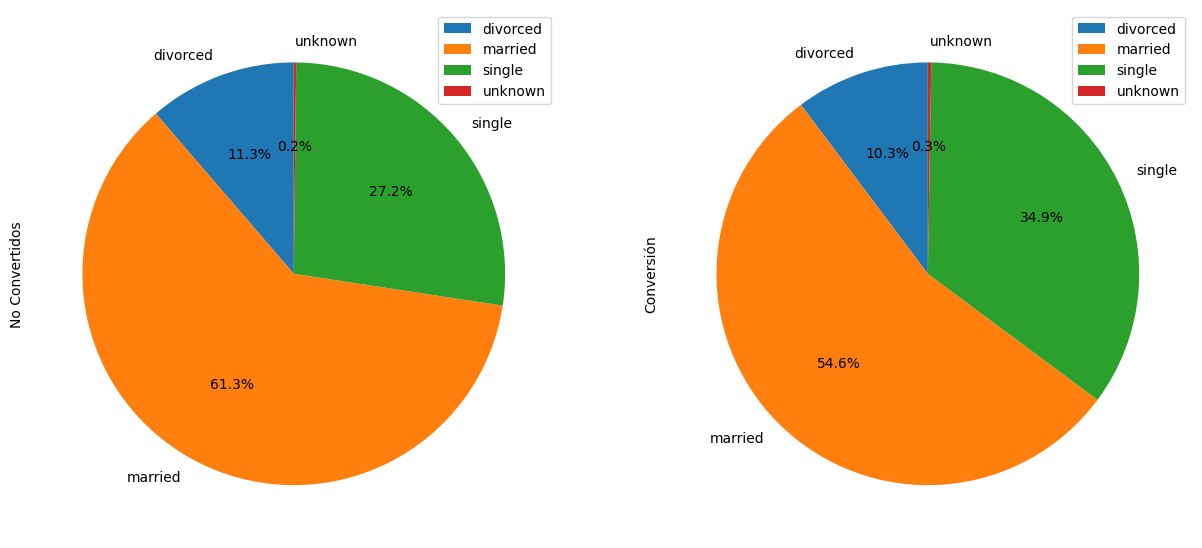

In [6]:
conversion_estado_marital = pd.pivot_table(df_banco, values="y", index="marital", columns="conversion", aggfunc=len)
conversion_estado_marital.columns=["No Convertidos", "Conversión"]
print(conversion_estado_marital)

conversion_estado_marital.plot(
    kind="pie",
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: "%0.1f%%" % x)

### 2.4 Tasa de conversión por estado marital y grupo etario. 

marital    divorced  married  single  unknown
age_group                                    
70<            64.0    151.0     6.0      0.0
<20             0.0      0.0    34.0      0.0
[20, 30]       12.0    158.0   717.0      1.0
[30, 40]      128.0    897.0   684.0      6.0
[40, 50]      126.0    575.0   130.0      3.0
[50, 60]      119.0    533.0    44.0      1.0
[60, 70]       27.0    218.0     5.0      1.0

 .......................................

marital    divorced   married    single   unknown
age_group                                        
70<        0.136461  0.321962  0.012793  0.000000
<20        0.000000  0.000000  0.453333  0.000000
[20, 30]   0.002145  0.028245  0.128173  0.000179
[30, 40]   0.007557  0.052958  0.040383  0.000354
[40, 50]   0.011970  0.054627  0.012350  0.000285
[50, 60]   0.017342  0.077674  0.006412  0.000146
[60, 70]   0.037293  0.301105  0.006906  0.001381


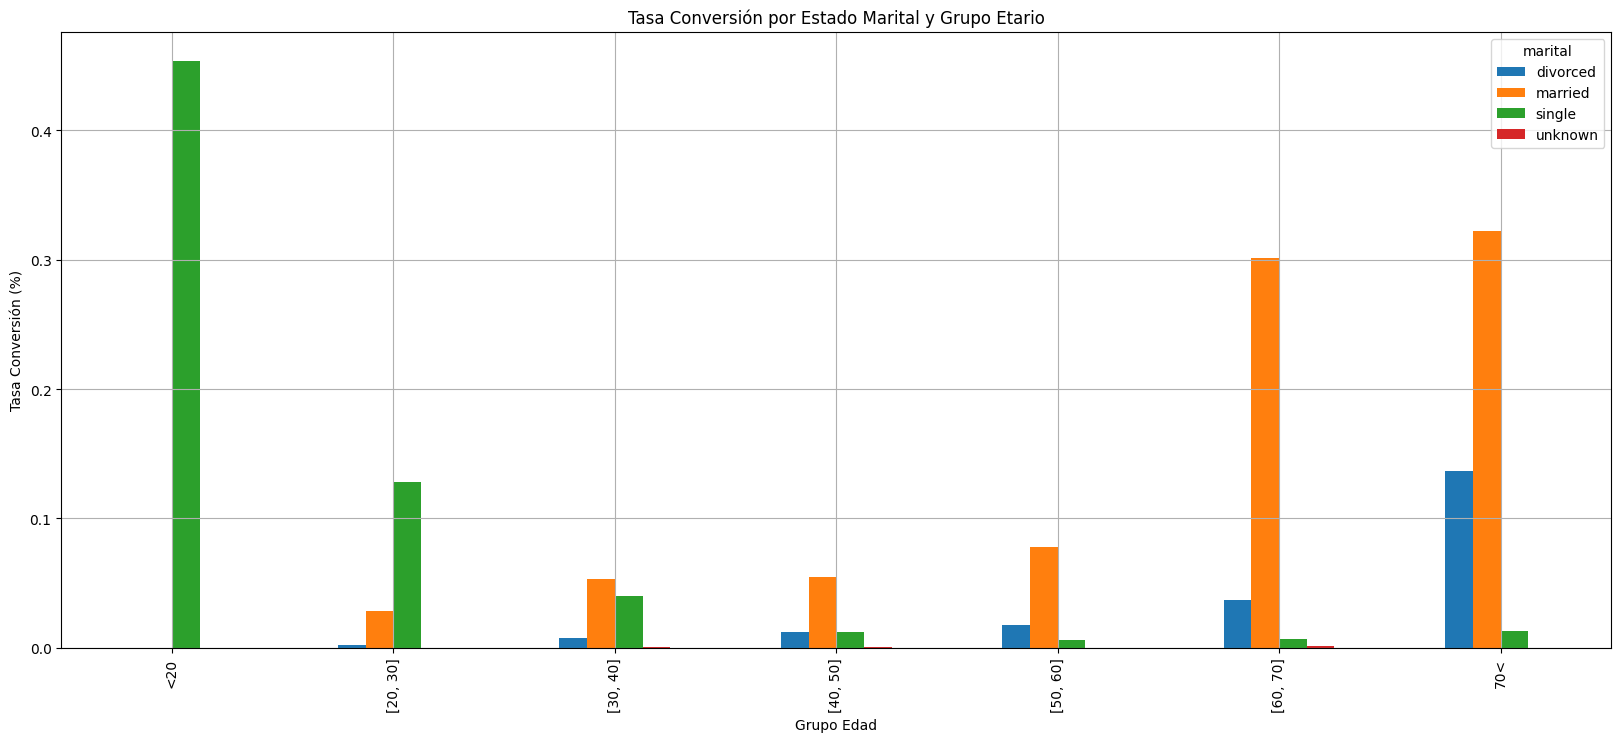

In [7]:
tasa_marital_grupo_etario = df_banco.groupby(["age_group", "marital"])["conversion"].sum().unstack("marital").fillna(0)
print(tasa_marital_grupo_etario)

tasa_marital_grupo_etario = tasa_marital_grupo_etario.divide(
    df_banco.groupby(
        by="age_group"
    )["conversion"].count(), axis=0)
print("\n .......................................\n")
print(tasa_marital_grupo_etario)

ax = tasa_marital_grupo_etario.loc[
    ["<20", "[20, 30]", "[30, 40]", "[40, 50]", "[50, 60]", "[60, 70]", "70<"]].plot(
    kind="bar",
    grid=True,
    figsize=(20, 8))

ax.set_title("Tasa Conversión por Estado Marital y Grupo Etario")
ax.set_xlabel("Grupo Edad")
ax.set_ylabel("Tasa Conversión (%)")
plt.show()

## 3. Generar un nuevo cruce entre la tasa de conversión y el nivel educativo. 
## 4. Graficar el  nuevo cruce entre la tasa de conversión y el nivel educativo. 

education
basic.4y               10.249042
basic.6y                8.202443
basic.9y                7.824648
high.school            10.835523
illiterate             22.222222
professional.course    11.348465
university.degree      13.724523
unknown                14.500289
Name: conversion, dtype: float64


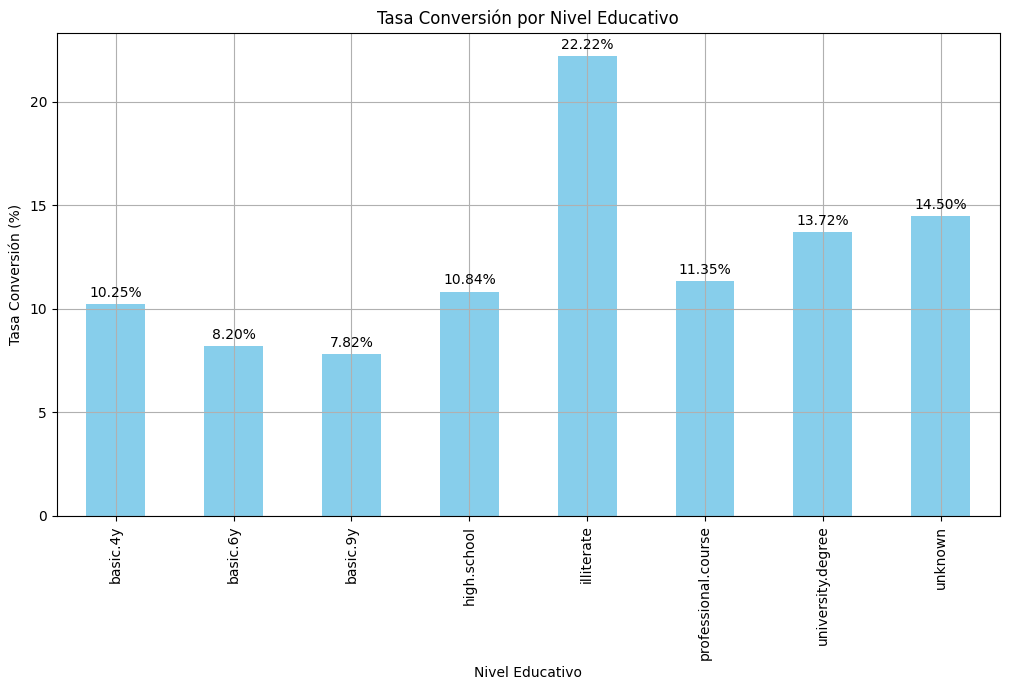

In [8]:
# Calculo de la Tasa de Conversiones por Nivel Educativo
tasa_conversion_educativo = df_banco.groupby(by="education")["conversion"].sum() / df_banco.groupby(by="education")["conversion"].count()*100
print(tasa_conversion_educativo)

# Graficamos la Tasa de Conversiones por Nivel Educativo
ax = tasa_conversion_educativo.plot(
    kind="bar",
    color="skyblue",
    grid=True,
    figsize=(10, 7),
    title="Tasa Conversión por Nivel Educativo")
#Extra
# Para añadir lo que seria el porcentaje en las barras para así ser mucho más claro visualmente con los datos
# ax.containers[0] contiene el conjunto de barras que acabamos dibujamos
ax.bar_label(ax.containers[0],    # etiqueta cada rectángulo de esa colección
             fmt="%.2f%%",        # formato con dos decimales y símbolo %
             padding=3)           # sangría en píxeles por encima de la barra
plt.tight_layout()
ax.set_xlabel("Nivel Educativo")
ax.set_ylabel("Tasa Conversión (%)")
plt.show()

## 5. Generar un nuevo cruce entre la tasa de conversión, el nivel educativo y del grupo etario. 
## 6. Graficar un nuevo cruce entre la tasa de conversión, el nivel educativo y el grupo etario.

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
age_group,,,,,,,,
70<,25.586354,1.066098,1.492537,2.558635,0.213220,4.477612,4.904051,6.823028
<20,4.000000,6.666667,9.333333,4.000000,0.000000,0.000000,0.000000,21.333333
"[20, 30]",0.268144,0.303897,1.841258,5.452270,0.000000,1.734001,5.362889,0.911691
"[30, 40]",0.247963,0.466407,0.962333,2.160822,0.005904,1.416932,4.581415,0.283386
"[40, 50]",0.532016,0.513015,0.940528,1.748052,0.009500,1.035531,2.707581,0.437013
"[50, 60]",1.821626,0.335179,1.296998,1.603031,0.014573,1.355290,3.278927,0.451763
"[60, 70]",9.254144,0.690608,0.690608,7.044199,0.000000,4.834254,8.425414,3.729282


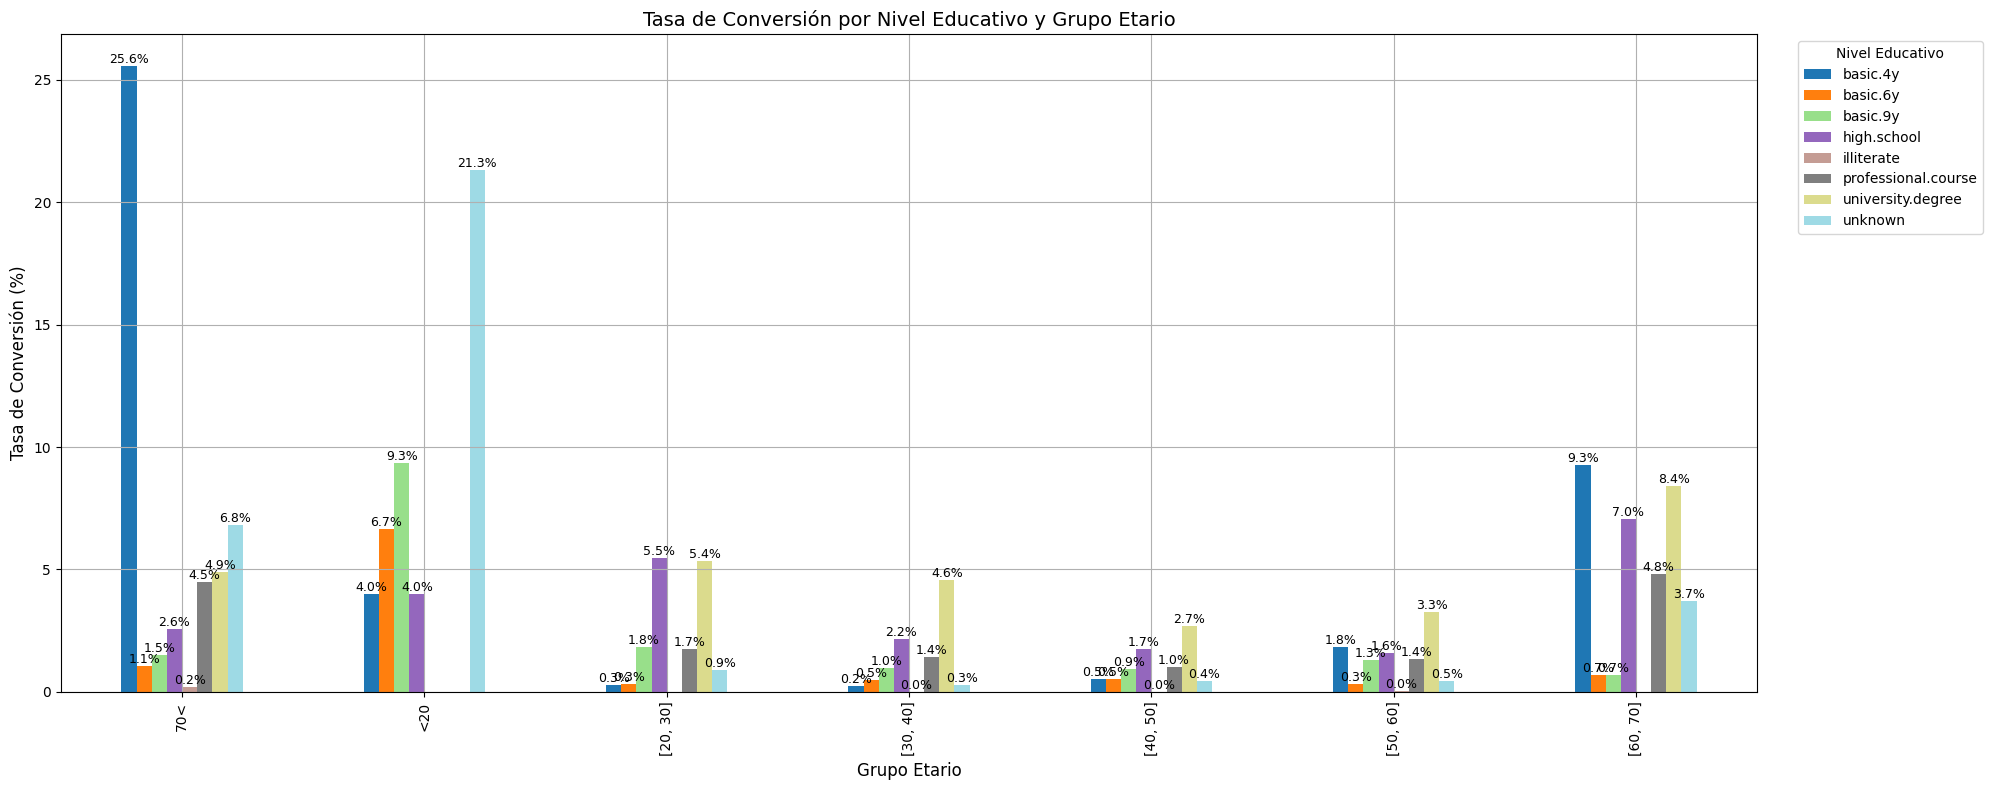

In [9]:
conversion_educacion_etario = df_banco.groupby(["education", "age_group"])["conversion"].sum().unstack("education").fillna(0)
tasa_educativo_grupo_etario = conversion_educacion_etario.divide(df_banco.groupby(by="age_group")["conversion"].count(), axis=0)*100.0
display(tasa_educativo_grupo_etario)

ax = tasa_educativo_grupo_etario.plot(
    kind="bar",
    grid=True,
    figsize=(20, 8),
    colormap="tab20")
ax.set_title("Tasa de Conversión por Nivel Educativo y Grupo Etario", fontsize=14)
ax.set_xlabel("Grupo Etario", fontsize=12)
ax.set_ylabel("Tasa de Conversión (%)", fontsize=12)
ax.legend(title="Nivel Educativo", bbox_to_anchor=(1.02, 1), loc="upper left")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + height
        ax.annotate(f"{height:.1f}%", (x, y), ha='center', va='bottom', fontsize=9)
    
plt.tight_layout()
plt.show()